In [1]:
import pandas as pd

import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

In [2]:
df = pd.read_csv("students/data.csv", sep=";")

Shape: (4424, 37)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
269,1,1,5,9500,1,1,151.0,1,1,1,...,0,8,8,7,13.671429,0,12.7,3.7,-1.70,Graduate
1396,1,1,1,9130,1,1,133.1,1,1,1,...,0,6,10,6,13.000000,0,16.2,0.3,-0.92,Enrolled
547,1,1,1,9670,1,1,133.1,1,38,19,...,0,6,11,2,14.500000,0,11.1,0.6,2.02,Enrolled
4054,1,1,2,9773,1,1,135.0,1,37,37,...,0,6,7,6,14.571429,0,8.9,1.4,3.51,Graduate
4290,1,1,1,171,1,1,147.0,1,1,12,...,7,13,14,11,12.181818,0,11.1,0.6,2.02,Graduate
275,1,17,3,9500,1,1,145.0,1,12,1,...,0,8,8,8,15.387500,0,13.9,-0.3,0.79,Graduate
3772,1,1,4,9238,1,1,127.0,1,1,38,...,0,6,7,6,13.428571,0,11.1,0.6,2.02,Graduate
3706,1,1,1,9147,1,1,139.0,1,38,1,...,0,5,13,4,11.250000,0,12.7,3.7,-1.70,Graduate
1379,1,51,1,9238,1,1,141.0,1,1,1,...,0,6,7,0,0.000000,0,11.1,0.6,2.02,Dropout
813,1,1,1,9500,1,1,162.0,1,3,4,...,0,8,9,8,14.144444,0,11.1,0.6,2.02,Graduate


In [3]:
df.columns = df.columns.str.strip().str.replace(' ', '_')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [4]:
df.sample(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [5]:
df.info()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [6]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target


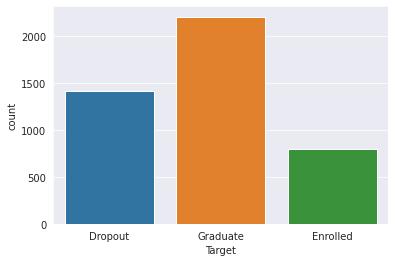

In [7]:
df.nunique()

/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:95: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:660: UserWarning: Glyph 9 (	) missing from current font.
  bboxes = [l.get_window_extent() for l in labels]
/tmp/ipykernel_141/2094695301.py:4: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig("figures/ch3_academic_feature_correlation.png", dpi=600)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


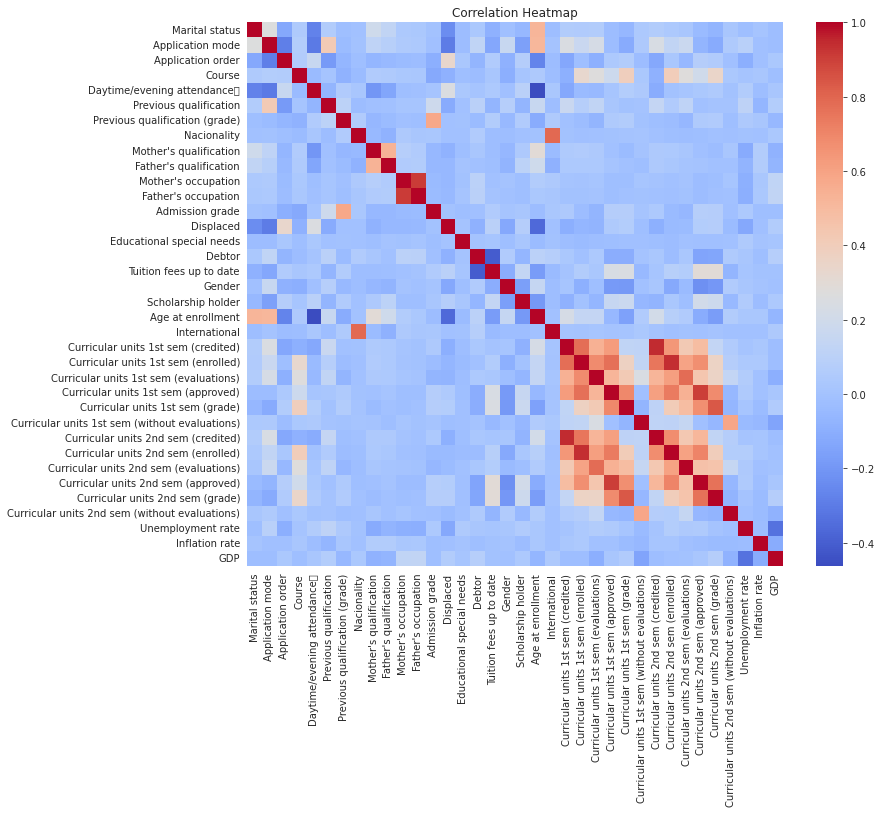

In [8]:
df.isnull().sum()

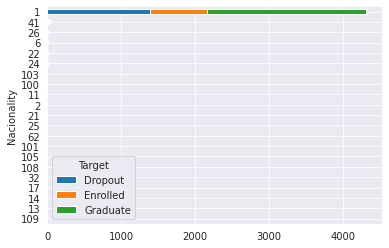

In [9]:
df[df.duplicated()]

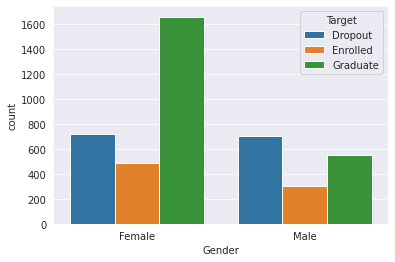

In [10]:
sns.countplot(data=df, x='Gender', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])
plt.xticks(ticks=[0,1], labels=['Female','Male'])

In [11]:
nationalities = df.groupby(['Nacionality', 'Target']).size().reset_index().pivot(columns='Target', index='Nacionality', values=0)
nationalities_total = nationalities.sum(axis=1)
nationalities_total = nationalities_total.sort_values(ascending=True)
nationalities.loc[nationalities_total.index].plot(kind='barh', stacked=True)

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig("figures/ch3_academic_feature_correlation.png", dpi=600)

In [13]:
df["Target"]=df["Target"].map({
    "Dropout":0,
    "Enrolled":1,
    "Graduate":2
})

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV 1/5; 1/243] START learning_rate=0.001, max_depth=-1, min_child_samples=10, n_estimators=50, num_leaves=32
[CV 1/5; 1/243] END learning_rate=0.001, max_depth=-1, min_child_samples=10, n_estimators=50, num_leaves=32;, score=0.498 total time=   0.2s
[CV 2/5; 1/243] START learning_rate=0.001, max_depth=-1, min_child_samples=10, n_estimators=50, num_leaves=32
[CV 2/5; 1/243] END learning_rate=0.001, max_depth=-1, min_child_samples=10, n_estimators=50, num_leaves=32;, score=0.499 total time=   0.2s
[CV 3/5; 1/243] START learning_rate=0.001, max_depth=-1, min_child_samples=10, n_estimators=50, num_leaves=32
[CV 3/5; 1/243] END learning_rate=0.001, max_depth=-1, min_child_samples=10, n_estimators=50, num_leaves=32;, score=0.499 total time=   0.2s
[CV 4/5; 1/243] START learning_rate=0.001, max_depth=-1, min_child_samples=10, n_estimators=50, num_leaves=32
[CV 4/5; 1/243] END learning_rate=0.001, max_depth=-1, min_child_samples=

In [14]:
X = df.drop(columns=["Target", "Nacionality", "International"], axis=1)
y = df["Target"]

{'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'n_estimators': 150, 'num_leaves': 32}
0.7841263389319222


In [15]:
def gbdt_parameter_optimization():
    params = {
        "max_depth": [-1, 32, 128],
        "n_estimators": [50, 100, 150],
        "min_child_samples": [10, 20, 30],
        "learning_rate": [0.001, 0.01, 0.1],
        "num_leaves": [32, 64, 128]
    }
    model = lgb.LGBMClassifier(force_row_wise=True, boosting_type="gbdt", verbose=-1)
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, verbose=10)
    grid_search.fit(X, y)
    return grid_search

In [16]:
results = gbdt_parameter_optimization()

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV 1/5; 1/243] START learning_rate=0.001, max_depth=-1, min_child_samples=10, n_estimators=50, num_leaves=32
[CV 1/5; 1/243] END learning_rate=0.001, max_depth=-1, min_child_samples=10, n_estimators=50, num_leaves=32;, score=0.498 total time=   0.2s
[CV 2/5; 1/243] START learning_rate=0.001, max_depth=-1, min_child_samples=10, n_estimators=50, num_leaves=32
[CV 2/5; 1/243] END learning_rate=0.001, max_depth=-1, min_child_samples=10, n_estimators=50, num_leaves=32;, score=0.499 total time=   0.2s
[CV 3/5; 1/243] START learning_rate=0.001, max_depth=-1, min_child_samples=10, n_estimators=50, num_leaves=32
[CV 3/5; 1/243] END learning_rate=0.001, max_depth=-1, min_child_samples=10, n_estimators=50, num_leaves=32;, score=0.499 total time=   0.2s
[CV 4/5; 1/243] START learning_rate=0.001, max_depth=-1, min_child_samples=10, n_estimators=50, num_leaves=32
[CV 4/5; 1/243] END learning_rate=0.001, max_depth=-1, min_child_samples=

In [17]:
print(results.best_params_)
print(results.best_score_)

{'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'n_estimators': 150, 'num_leaves': 64}
0.7823184293274024


In [18]:
def dart_parameter_optimization():
    params = {
        "max_depth": [-1, 32, 128],
        "n_estimators": [50, 100, 150],
        "min_child_samples": [10, 20, 30],
        "learning_rate": [0.001, 0.01, 0.1],
        "num_leaves": [32, 64, 128]
    }
    model = lgb.LGBMClassifier(force_row_wise=True, boosting_type="dart", verbose=-1)
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, verbose=10)
    grid_search.fit(X, y)
    return grid_search

In [19]:
results = dart_parameter_optimization()

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV 1/5; 1/243] START learning_rate=0.001, max_depth=-1, min_child_samples=10, n_estimators=50, num_leaves=32
[CV 1/5; 1/243] END learning_rate=0.001, max_depth=-1, min_child_samples=10, n_estimators=50, num_leaves=32;, score=0.498 total time=   0.1s
[CV 2/5; 1/243] START learning_rate=0.001, max_depth=-1, min_child_samples=10, n_estimators=50, num_leaves=32
[CV 2/5; 1/243] END learning_rate=0.001, max_depth=-1, min_child_samples=10, n_estimators=50, num_leaves=32;, score=0.499 total time=   0.1s
[CV 3/5; 1/243] START learning_rate=0.001, max_depth=-1, min_child_samples=10, n_estimators=50, num_leaves=32
[CV 3/5; 1/243] END learning_rate=0.001, max_depth=-1, min_child_samples=10, n_estimators=50, num_leaves=32;, score=0.499 total time=   0.1s
[CV 4/5; 1/243] START learning_rate=0.001, max_depth=-1, min_child_samples=10, n_estimators=50, num_leaves=32
[CV 4/5; 1/243] END learning_rate=0.001, max_depth=-1, min_child_samples=

In [20]:
print(results.best_params_)
print(results.best_score_)

{'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 30, 'n_estimators': 150, 'num_leaves': 128}
0.7755385126671268


In [21]:
def dart_goss_parameter_optimization():
    params = {
        "max_depth": [-1, 32, 128],
        "n_estimators": [50, 100, 150],
        "min_child_samples": [10, 20, 30],
        "learning_rate": [0.001, 0.01, 0.1],
        "num_leaves": [32, 64, 128]
    }
    model = lgb.LGBMClassifier(force_row_wise=True, boosting_type="dart", data_sample_strategy="goss", verbose=-1)
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, verbose=10)
    grid_search.fit(X, y)
    return grid_search

In [22]:
results = dart_goss_parameter_optimization()

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START min_samples_leaf=10, min_samples_split=10, n_estimators=50.
[CV 1/5; 1/48] END min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.757 total time=   0.2s
[CV 2/5; 1/48] START min_samples_leaf=10, min_samples_split=10, n_estimators=50.
[CV 2/5; 1/48] END min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.772 total time=   0.2s
[CV 3/5; 1/48] START min_samples_leaf=10, min_samples_split=10, n_estimators=50.
[CV 3/5; 1/48] END min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.763 total time=   0.2s
[CV 4/5; 1/48] START min_samples_leaf=10, min_samples_split=10, n_estimators=50.
[CV 4/5; 1/48] END min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.771 total time=   0.2s
[CV 5/5; 1/48] START min_samples_leaf=10, min_samples_split=10, n_estimators=50.
[CV 5/5; 1/48] END min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.7

In [23]:
print(results.best_params_)
print(results.best_score_)

{'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 100}
0.7680796073318507


In [24]:
def rf_parameter_optimization():
    params = {
        "n_estimators": [50, 100, 150],
        "min_samples_split": [10, 20, 40, 80],
        "min_samples_leaf": [10, 20, 40, 80],
    }
    model = RandomForestClassifier()
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, verbose=10)
    grid_search.fit(X, y)
    return grid_search

0.7156999925366155

In [25]:
results = rf_parameter_optimization()

0.7032158209728457

In [26]:
print(results.best_params_)
print(results.best_score_)

0.7028981806480831

In [27]:
model = lgb.LGBMClassifier(force_row_wise=True, boosting_type="gbdt", learning_rate=0.1, max_depth=-1, min_child_samples=10, n_estimators=100, num_leaves=32, verbose=-1)

scores = cross_val_score(model, X, y, scoring="f1_macro")
scores.mean()

0.6649933057107895

In [27]:
model = lgb.LGBMClassifier(force_row_wise=True, boosting_type="dart", learning_rate=0.1, max_depth=128, min_child_samples=30, n_estimators=150, num_leaves=128, verbose=-1)

scores = cross_val_score(model, X, y, scoring="f1_macro")
scores.mean()

In [42]:
model = lgb.LGBMClassifier(force_row_wise=True, boosting_type="dart", data_sample_strategy="goss", learning_rate=0.1, max_depth=128, min_child_samples=30, n_estimators=150, num_leaves=128, verbose=-1)

scores = cross_val_score(model, X, y, scoring="f1_macro")
scores.mean()

0.7028981806480831

In [43]:
model = RandomForestClassifier(n_estimators=150, min_samples_leaf=10, min_samples_split=20)

scores = cross_val_score(model, X, y, scoring="f1_macro")
scores.mean()

0.668066356606089